In [9]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
import sys
sys.path.insert(0,"../")
import loader
import score

In [5]:
model_path = "../saved_models/cnn16-lr-3"
is_verbose = True
batch_size = 1
evl, ldr = score.load_model(model_path, is_verbose, batch_size)

DEBUG:Network:First activation mat shape (1, ?, 1, 1)
DEBUG:Network:Next activation mat shape (1, ?, 1, 64)
DEBUG:Network:Next activation mat shape (1, ?, 1, 64)
DEBUG:Network:Next activation mat shape (1, ?, 1, 64)
DEBUG:Loader:Training set has 6823 samples
DEBUG:Loader:Validation set has 1705 samples
DEBUG:Loader:Data set {6823 samples}, batch size {1} -> 6823 batches
DEBUG:Loader:Data set {1705 samples}, batch size {1} -> 1705 batches


In [6]:
predictions, labels = score.eval_all(ldr, evl)
ecgs = [b[0] for b, _ in ldr.val]

<IPython.core.display.Javascript object>


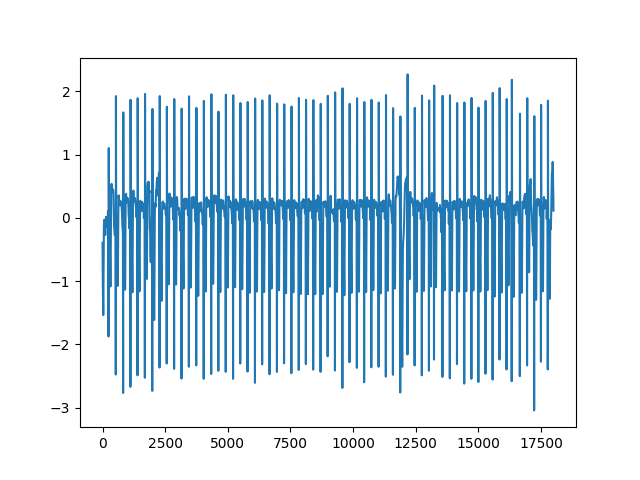

Ground Truth: O
Prediction: N


In [28]:
i = 8
errors = [p != l for p, l in zip(predictions, labels)]
err_inds = np.where(errors)[0]
idx = err_inds[i]
plt.plot(ecgs[idx])
print("Ground Truth:", ldr.int_to_class(labels[idx]))
print("Prediction:", ldr.int_to_class(predictions[idx]))